In [226]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 125)
pd.set_option('display.max_columns', 125)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tqdm
sns.set()

In [227]:
# загражаем датасет
df_full=pd.read_csv(r'application_data.csv')
df_full.shape

(307511, 122)

In [228]:
df_full.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [229]:
df_full

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Обработка признаков

In [230]:
#убираем фичи с заполненостью меньше 40%
a = df_full.isnull().sum().to_frame().rename(columns={0:'counts'})
a['dolya']=a.counts/df_full.shape[0]*100
a=a.sort_values(by='dolya',ascending=False).reset_index()
features=a[a.dolya<15]['index'].tolist()
df=df_full[features].dropna().reset_index(drop=True).copy()
a.head()

,index,counts,dolya
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963


In [231]:
df = df.merge(exp_df, on="SK_ID_CURR")
df

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_3,OWN_CAR_AGE
0,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,406597.5,202500.0,1,0,0,1,0,0,0,0,10,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002,0.083037,0.139376,-10.0
1,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1293502.5,270000.0,1,0,0,0,0,0,0,0,11,MONDAY,1,1,0,1,School,0,1,1,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003,0.311267,NaN,-10.0
2,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,0,Revolving loans,M,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,135000.0,67500.0,1,0,0,0,0,0,0,0,9,MONDAY,2,2,0,1,Government,1,1,1,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004,NaN,0.729567,26.0
3,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,1,Cash loans,M,N,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,513000.0,121500.0,0,1,1,0,0,0,0,0,11,THURSDAY,2,2,0,1,Religion,0,1,1,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007,NaN,NaN,-10.0
4,0.0,0.0,0.0,0.0,1.0,1.0,"Spouse, partner",0.0,0.0,0.0,0.0,0.354225,454500.0,27517.5,2.0,-2536.0,0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,490495.5,99000.0,1,0,0,0,0,0,0,0,16,WEDNESDAY,2,2,0,1,Other,1,1,1,-477,-4970.0,-1588,-16941,0.035792,House / apartment,Married,Secondary / secondary special,State servant,100008,NaN,0.621226,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263418,0.0,0.0,0.0,1.0,0.0,2.0,Unaccompanied,9.0,3.0,9.0,2.0,0.501221,247500.0,17770.5,1.0,-2315.0,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,345510.0,112500.0,0,0,0,0,0,0,0,0,11,SATURDAY,2,2,1,1,Bank,0,1,1,-3936,-675.0,-399,-11870,0.022800,House / apartment,Single / not married,Higher education,Commercial associate,456247,0.243466,0.609276,-10.0
263419,0.0,0.0,0.0,2.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.346391,225000.0,22050.0,1.0,0.0,0,0,Cash loans,F,N,0,0,0,0,1,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,225000.0,112500.0,1,0,0,0,0,0,0,0,15,MONDAY,2,

# Обрабатываем фичи

In [232]:
if df.DAYS_ID_PUBLISH.max() <= 0:
    df.DAYS_ID_PUBLISH *= (-1)
    print("DAYS_ID_PUBLISH изменен")
    

DAYS_ID_PUBLISH изменен


In [233]:
if df.DAYS_REGISTRATION.max() <= 0:
    df.DAYS_REGISTRATION *= (-1)
    print("DAYS_REGISTRATION изменен")
        
    

DAYS_REGISTRATION изменен


In [234]:
# из возраста в днях делаем возраст в годах
if "DAYS_BIRTH" in df.columns:
    df["age"] = df.DAYS_BIRTH // 365 * -1
    df.drop(columns=["DAYS_BIRTH"], inplace=True)
    print("DAYS_BIRTH удален")


DAYS_BIRTH удален


In [235]:
# из дней работы в месяцы
if "DAYS_EMPLOYED" in df.columns:
    df["month_employed"] = df.DAYS_EMPLOYED.apply(lambda x: (x*(-1) // 30) if x < 0 else (x // 30) )
    df.drop(columns=["DAYS_EMPLOYED"], inplace=True)
    print("DAYS_EMPLOYED удален")

DAYS_EMPLOYED удален


In [236]:
# делаем признак который показывает колличество предоставленных документов заемщиком 
if "FLAG_DOCUMENT_2" in df.columns:
    
    df["doc_count"] = 0
    
    for e in df.columns:
        if "FLAG_DOCUMENT" in e:
            df["doc_count"] += df[e]
            df = df.drop(columns=[e])
    print("Признаки 'FLAG_DOCUMENT_*' удалены") 

Признаки 'FLAG_DOCUMENT_*' удалены


In [237]:
# делаем признак который показывает количество запросов в кредитное бюро на заемщика за год
tmp_df = df.copy()
if "AMT_REQ_CREDIT_BUREAU_HOUR" in tmp_df.columns:
    
    tmp_df["req_credit_bureau_count"] = 0
    
    for e in tmp_df.columns:
        if "AMT_REQ_CREDIT_BUREAU" in e:
            tmp_df["req_credit_bureau_count"] += tmp_df[e]
            tmp_df = tmp_df.drop(columns=[e])
    print("Признаки 'AMT_REQ_CREDIT_BUREAU_***' удалены")
    df = tmp_df.copy()

Признаки 'AMT_REQ_CREDIT_BUREAU_***' удалены


In [238]:
#удалим FLAG_WORK_PHONE, т.к. это тоже самое что и FLAG_PHONE
if "FLAG_WORK_PHONE" in df.columns:
    df = df.drop(columns="FLAG_WORK_PHONE")
    print("FLAG_WORK_PHONE удален ")

FLAG_WORK_PHONE удален 


In [239]:
# удалим FLAG_MOBIL, т.к. все знач. 1
if "FLAG_MOBIL" in df.columns:
    
    df = df.drop(columns=["FLAG_MOBIL"])
    
    print("FLAG_MOBIL удален")

FLAG_MOBIL удален


In [240]:
#введем признак колличество способов связи с заемщиком
arr = ["FLAG_EMP_PHONE", "FLAG_PHONE", "FLAG_EMAIL"]

tmp_df = df
if "FLAG_PHONE" in df.columns:
    
    tmp_df["communication_count"] = 0
    
    for e in df.columns:
        if e in arr:
            tmp_df["communication_count"] += tmp_df[e]
            tmp_df = tmp_df.drop(columns=e)
            
    print('Признаки "FLAG_EMP_PHONE", "FLAG_PHONE", "FLAG_EMAIL" удалены')
    
    df = tmp_df


Признаки "FLAG_EMP_PHONE", "FLAG_PHONE", "FLAG_EMAIL" удалены


In [241]:
# удалим WEEKDAY_APPR_PROCESS_START (день недели когда был выдан кредит) 
# и HOUR_APPR_PROCESS_START ( час когда клиент подал заявку на кредит)


if "WEEKDAY_APPR_PROCESS_START" in df.columns:
    
    df = df.drop(columns="WEEKDAY_APPR_PROCESS_START")
    
    print("WEEKDAY_APPR_PROCESS_START удален")
    
    
    
if "HOUR_APPR_PROCESS_START" in df.columns:
    
    df = df.drop(columns="HOUR_APPR_PROCESS_START")   
    
    print("HOUR_APPR_PROCESS_START удален")

WEEKDAY_APPR_PROCESS_START удален
HOUR_APPR_PROCESS_START удален


In [242]:
# исправим DAYS_LAST_PHONE_CHANGE с отр. знач. на полож.

if df.DAYS_LAST_PHONE_CHANGE.min() < 0:
    
    df.DAYS_LAST_PHONE_CHANGE *= (-1)
    
    print("DAYS_LAST_PHONE_CHANGE изменен")


DAYS_LAST_PHONE_CHANGE изменен


In [243]:
# Удалим ORGANIZATION_TYPE, т.к. там много градаций

if "ORGANIZATION_TYPE" in df.columns:
    
    df = df.drop(columns="ORGANIZATION_TYPE")
    
    print("ORGANIZATION_TYPE удален")



ORGANIZATION_TYPE удален


In [244]:
#удалим строки у которых занчение пола = XNA 
df = df.drop(df[df["CODE_GENDER"] == "XNA"].index)

In [245]:
# кодирование качественных признаков
tmp_df = df
if "M" in list(tmp_df.CODE_GENDER.unique()):
    tmp_df.CODE_GENDER = tmp_df.CODE_GENDER.map({"M" : 0, "F" : 1})
    
if "Cash loans" in list(tmp_df.NAME_CONTRACT_TYPE.unique()):
    tmp_df.NAME_CONTRACT_TYPE = tmp_df.NAME_CONTRACT_TYPE.map({'Cash loans' : 0, 'Revolving loans' : 1})
    
if "N" in list(tmp_df.FLAG_OWN_CAR.unique()):
    tmp_df.FLAG_OWN_CAR = tmp_df.FLAG_OWN_CAR.map({'N' : 0, 'Y' : 1})
    
if "N" in list(tmp_df.FLAG_OWN_REALTY.unique()):
    tmp_df.FLAG_OWN_REALTY = tmp_df.FLAG_OWN_REALTY.map({'Y' : 1, 'N' : 0})
    
df = tmp_df


In [246]:
# кодирование NAME_TYPE_SUITE

tmp_df = df

if "NAME_TYPE_SUITE" in tmp_df.columns:
    
    tmp_df["unaccompanied_TYPE_SUITE"] = tmp_df["NAME_TYPE_SUITE"].apply(lambda x: 1 if x == "Unaccompanied" else 0)
    tmp_df["family_TYPE_SUITE"] = tmp_df["NAME_TYPE_SUITE"].apply(lambda x: 1 if x == "Family" else 0)
    tmp_df["spouse,_partner_TYPE_SUITE"] = tmp_df["NAME_TYPE_SUITE"].apply(lambda x: 1 if x == "Spouse, partner" else 0)
    tmp_df["children_TYPE_SUITE"] = tmp_df["NAME_TYPE_SUITE"].apply(lambda x: 1 if x == "Children" else 0)
    tmp_df["other_TYPE_SUITE"] = tmp_df["NAME_TYPE_SUITE"].apply(lambda x: 1 if x in ['Other_A', 'Other_B', 'Group of people'] else 0)

    tmp_df.drop(columns="NAME_TYPE_SUITE", inplace=True)

    print("NAME_TYPE_SUITE удален")
    
    df = tmp_df
    
df

NAME_TYPE_SUITE удален


,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_CONT_MOBILE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_3,OWN_CAR_AGE,age,month_employed,doc_count,req_credit_bureau_count,communication_count,unaccompanied_TYPE_SUITE,family_TYPE_SUITE,"spouse,_partner_TYPE_SUITE",children_TYPE_SUITE,other_TYPE_SUITE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,1134.0,0,0,0,0,1,406597.5,202500.0,0,0,1,0,0,0,0,2,2,1,2120,3648.0,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002,0.083037,0.139376,-10.0,26,21,1,1.0,2,1,0,0,0,0
1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,828.0,0,0,1,0,0,1293502.5,270000.0,0,0,0,0,0,0,0,1,1,1,291,1186.0,0.003541,House / apartment,Married,Higher education,State servant,100003,0.311267,NaN,-10.0,46,39,1,0.0,2,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,815.0,0,1,0,1,1,135000.0,67500.0,0,0,0,0,0,0,0,2,2,1,2531,4260.0,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004,NaN,0.729567,26.0,53,7,0,0.0,2,1,0,0,0,0
3,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,1106.0,0,0,0,0,1,513000.0,121500.0,1,1,0,0,0,0,0,2,2,1,3458,4311.0,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007,NaN,NaN,-10.0,55,101,1,0.0,1,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.354225,454500.0,27517.5,2.0,2536.0,0,0,0,0,1,490495.5,99000.0,0,0,0,0,0,0,0,2,2,1,477,4970.0,0.035792,House / apartment,Married,Secondary / secondary special,State servant,100008,NaN,0.621226,-10.0,47,52,1,2.0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263418,9.0,3.0,9.0,2.0,0.501221,247500.0,17770.5,1.0,2315.0,0,0,1,0,1,345510.0,112500.0,0,0,0,0,0,0,0,2,2,1,3936,675.0,0.022800,House / apartment,Single / not married,Higher education,Commercial associate,456247,0.243466,0.609276,-10.0,33,13,1,3.0,2,1,0,0,0,0
263419,0.0,0.0,0.0,0.0,0.346391,225000.0,22050.0,1.0,-0.0,0,0,1,0,1,225000.0,112500.0,0,0,0,0,0,0,0,2,2,1,2357,7369.0,0.022800,House / apartment,Single / not married,Secondary / secondary special,Pensioner,456249,NaN,0.742182,-10.0,67,12174,1,2.0,1,1,0,0,0,0
263420,6.0,0.0,6.0,0.0,0.535722,585000.0,29979.0,1.0,1909.0,0,0,1,0,1,677664.0,153000.0,1,1,0,0,0,0,0,3,3,1,5150,6737.0,0.005002,House / apartment,Separated,Higher education,Working,456253,0.744026,0.218859,-10.0,42,264,1,3.0,2,1,0,0,0,0
263421,0.0,0.0,0.0,0.0,0.514163,319500.0,20205.0,2.0,322.0,0,0,1,0,1,370107.0,171000.0,0,1,1,1,0,0,0,2,2,1,931,2562.0,0.005313,House / apartment,Married,Secondary / secondary special,Commercial associate,456254,NaN,0.661024,-10.0,33,159,1,0.0,1,1,0,0,0,0


In [247]:
# кодирование NAME_HOUSING_TYPE 

tmp_df = df

if "NAME_HOUSING_TYPE" in tmp_df.columns:
    
    tmp_df["house/apartment_HOUSING_TYPE"] = tmp_df["NAME_HOUSING_TYPE"].apply(lambda x: 1 if x == "House / apartment" else 0)
    
    tmp_df.drop(columns="NAME_HOUSING_TYPE", inplace=True)
    
    print("NAME_HOUSING_TYPE удален")
    
    df = tmp_df
    

NAME_HOUSING_TYPE удален


In [248]:
df["NAME_EDUCATION_TYPE"].value_counts(normalize=True)

Secondary / secondary special    0.706342
Higher education                 0.248915
Incomplete higher                0.032329
Lower secondary                  0.011871
Academic degree                  0.000543
Name: NAME_EDUCATION_TYPE, dtype: float64

In [249]:
# кодируем признак NAME_EDUCATION_TYPE как наличие высшего образования 1, иначе 0

tmp_df = df

if "NAME_EDUCATION_TYPE" in tmp_df.columns:
    
    tmp_df["higher_EDUCATION_TYPE"] = tmp_df["NAME_EDUCATION_TYPE"].apply(lambda x: 1 if x in ["Higher education", "Academic degree"] else 0)
    
    tmp_df.drop(columns="NAME_EDUCATION_TYPE", inplace=True)
    
    print("NAME_EDUCATION_TYPE удален")
    
    df = tmp_df


NAME_EDUCATION_TYPE удален


In [250]:
# кодирование NAME_FAMILY_STATUS 

tmp_df = df

if "NAME_FAMILY_STATUS" in tmp_df.columns:
    
    tmp_df["married_FAMILY_STATUS"] = tmp_df["NAME_FAMILY_STATUS"].apply(lambda x: 1 if x == "Married" else 0)
    tmp_df["single/not_married_FAMILY_STATUS"] = tmp_df["NAME_FAMILY_STATUS"].apply(lambda x: 1 if x == "Single / not married" else 0)
    tmp_df["civil_marriage_FAMILY_STATUS"] = tmp_df["NAME_FAMILY_STATUS"].apply(lambda x: 1 if x == "Civil marriage" else 0)
    tmp_df["over_FAMILY_STATUS"] = tmp_df["NAME_FAMILY_STATUS"].apply(lambda x: 1 if x in ["Separated", "Widow"] else 0)
    
    tmp_df.drop(columns="NAME_FAMILY_STATUS", inplace=True)
    
    print("NAME_FAMILY_STATUS удален")
    
    df = tmp_df
    

NAME_FAMILY_STATUS удален


In [251]:
# кодирование NAME_INCOME_TYPE 

tmp_df = df

if "NAME_INCOME_TYPE" in tmp_df.columns:
    
    tmp_df["working_INCOME_TYPE"] = tmp_df["NAME_INCOME_TYPE"].apply(lambda x: 1 if x == "Working" else 0)
    tmp_df["commercial_associate_INCOME_TYPE"] = tmp_df["NAME_INCOME_TYPE"].apply(lambda x: 1 if x == "Commercial associate" else 0)
    tmp_df["pensioner_INCOME_TYPE"] = tmp_df["NAME_INCOME_TYPE"].apply(lambda x: 1 if x == "Pensioner" else 0)
    tmp_df["state_servant_INCOME_TYPE"] = tmp_df["NAME_INCOME_TYPE"].apply(lambda x: 1 if x == "State servant" else 0)
    
    tmp_df.drop(columns="NAME_INCOME_TYPE", inplace=True)
    
    print("NAME_INCOME_TYPE удален")
    
    df = tmp_df
    
    

NAME_INCOME_TYPE удален


In [252]:
#удаляем выброс  
print(df.shape)
df = df.drop(df[df.req_credit_bureau_count > 200].index)
print(df.shape)

(263419, 53)
(263418, 53)


In [253]:
df

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_CONT_MOBILE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_3,OWN_CAR_AGE,age,month_employed,doc_count,req_credit_bureau_count,communication_count,unaccompanied_TYPE_SUITE,family_TYPE_SUITE,"spouse,_partner_TYPE_SUITE",children_TYPE_SUITE,other_TYPE_SUITE,house/apartment_HOUSING_TYPE,higher_EDUCATION_TYPE,married_FAMILY_STATUS,single/not_married_FAMILY_STATUS,civil_marriage_FAMILY_STATUS,over_FAMILY_STATUS,working_INCOME_TYPE,commercial_associate_INCOME_TYPE,pensioner_INCOME_TYPE,state_servant_INCOME_TYPE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,1134.0,0,0,0,0,1,406597.5,202500.0,0,0,1,0,0,0,0,2,2,1,2120,3648.0,0.018801,100002,0.083037,0.139376,-10.0,26,21,1,1.0,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,828.0,0,0,1,0,0,1293502.5,270000.0,0,0,0,0,0,0,0,1,1,1,291,1186.0,0.003541,100003,0.311267,NaN,-10.0,46,39,1,0.0,2,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,815.0,0,1,0,1,1,135000.0,67500.0,0,0,0,0,0,0,0,2,2,1,2531,4260.0,0.010032,100004,NaN,0.729567,26.0,53,7,0,0.0,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,1106.0,0,0,0,0,1,513000.0,121500.0,1,1,0,0,0,0,0,2,2,1,3458,4311.0,0.028663,100007,NaN,NaN,-10.0,55,101,1,0.0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.354225,454500.0,27517.5,2.0,2536.0,0,0,0,0,1,490495.5,99000.0,0,0,0,0,0,0,0,2,2,1,477,4970.0,0.035792,100008,NaN,0.621226,-10.0,47,52,1,2.0,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263418,9.0,3.0,9.0,2.0,0.501221,247500.0,17770.5,1.0,2315.0,0,0,1,0,1,345510.0,112500.0,0,0,0,0,0,0,0,2,2,1,3936,675.0,0.022800,456247,0.243466,0.609276,-10.0,33,13,1,3.0,2,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0
263419,0.0,0.0,0.0,0.0,0.346391,225000.0,22050.0,1.0,-0.0,0,0,1,0,1,225000.0,112500.0,0,0,0,0,0,0,0,2,2,1,2357,7369.0,0.022800,456249,NaN,0.742182,-10.0,67,12174,1,2.0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
263420,6.0,0.0,6.0,0.0,0.535722,585000.0,29979.0,1.0,1909.0,0,0,1,0,1,677664.0,153000.0,1,1,0,0,0,0,0,3,3,1,5150,6737.0,0.005002,456253,0.744026,0.218859,-10.0,42,264,1,3.0,2,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0
263421,0.0,0.0,0.0,0.0,0.514163,319500.0,20205.0,2.0,322.0,0,0,1,0,1,370107.0,171000.0,0,1,1,1,0,0,0,2,2,1,931,2562.0,0.005313,456254,NaN,0.661024,-10.0,33,159,1,0.0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [254]:
df.columns

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'CNT_CHILDREN', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY',
       'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'FLAG_CONT_MOBILE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'REGION_POPULATION_RELATIVE', 'SK_ID_CURR', 'EXT_SOURCE_1',
       'EXT_SOURCE_3', 'OWN_CAR_AGE', 'age', 'month_employed', 'doc_count',
       'req_credit_bureau_count', 'communication_count',
       'unaccompanied_TYPE_SUITE', 'family_TYPE_SUITE',
       'spouse,_partner_TYPE_SUITE', 'children_TYP

In [255]:
df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_CONT_MOBILE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_3,OWN_CAR_AGE,age,month_employed,doc_count,req_credit_bureau_count,communication_count,unaccompanied_TYPE_SUITE,family_TYPE_SUITE,"spouse,_partner_TYPE_SUITE",children_TYPE_SUITE,other_TYPE_SUITE,house/apartment_HOUSING_TYPE,higher_EDUCATION_TYPE,married_FAMILY_STATUS,single/not_married_FAMILY_STATUS,civil_marriage_FAMILY_STATUS,over_FAMILY_STATUS,working_INCOME_TYPE,commercial_associate_INCOME_TYPE,pensioner_INCOME_TYPE,state_servant_INCOME_TYPE
count,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,2.634180e+05,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,2.634180e+05,2.634180e+05,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,116588.000000,244276.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000,263418.000000
mean,1.431865,0.143286,1.414888,0.099598,0.517538,5.451637e+05,27214.255814,2.164192,988.618602,0.422708,0.090578,0.662719,0.348089,0.691669,6.068562e+05,1.711725e+05,0.177406,0.225937,0.077470,0.075040,0.039982,0.049492,0.014354,2.033327,2.054161,0.998003,3048.798658,4988.397380,0.020812,278123.206151,0.506746,0.510768,-2.349031,44.656132,2251.118200,0.935308,2.486649,1.163914,0.813969,0.130116,0.036357,0.010493,0.009065,0.890797,0.249455,0.647621,0.140993,0.093862,0.117524,0.515136,0.231985,0.179456,0.073344
std,2.419784,0.446170,2.398608,0.361264,0.189650,3.710476e+05,14379.954103,0.910992,832.923931,0.725927,0.287009,0.472783,0.476365,0.461805,4.044331e+05,2.492448e+05,0.382013,0.418199,0.267336,0.263457,0.195917,0.216893,0.118944,0.499127,0.505174,0.044641,1490.634849,3522.297856,0.013725,102818.844446,0.209944,0.194842,12.631825,11.799668,4640.779339,0.340243,2.231631,0.644100,0.389133,0.336432,0.187176,0.101896,0.094780,0.311894,0.432699,0.477712,0.348015,0.291638,0.322045,0.499772,0.422100,0.383735,0.260700
min,0.000000,0.000000,0.000000,0.000000,0.000001,4.050000e+04,1615.500000,1.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+04,2.610000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-0.000000,0.000290,100002.000000,0.014568,0.000527,-10.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.399099,2.385000e+05,16681.500000,2.000000,286.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.730240e+05,1.125000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1814.000000,2006.000000,0.010006,188976.250000,0.340365,0.370650,-10.000000,35.000000,32.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.569029,4.500000e+05,25033.500000,2.000000,798.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.212800e+

<Axes: >

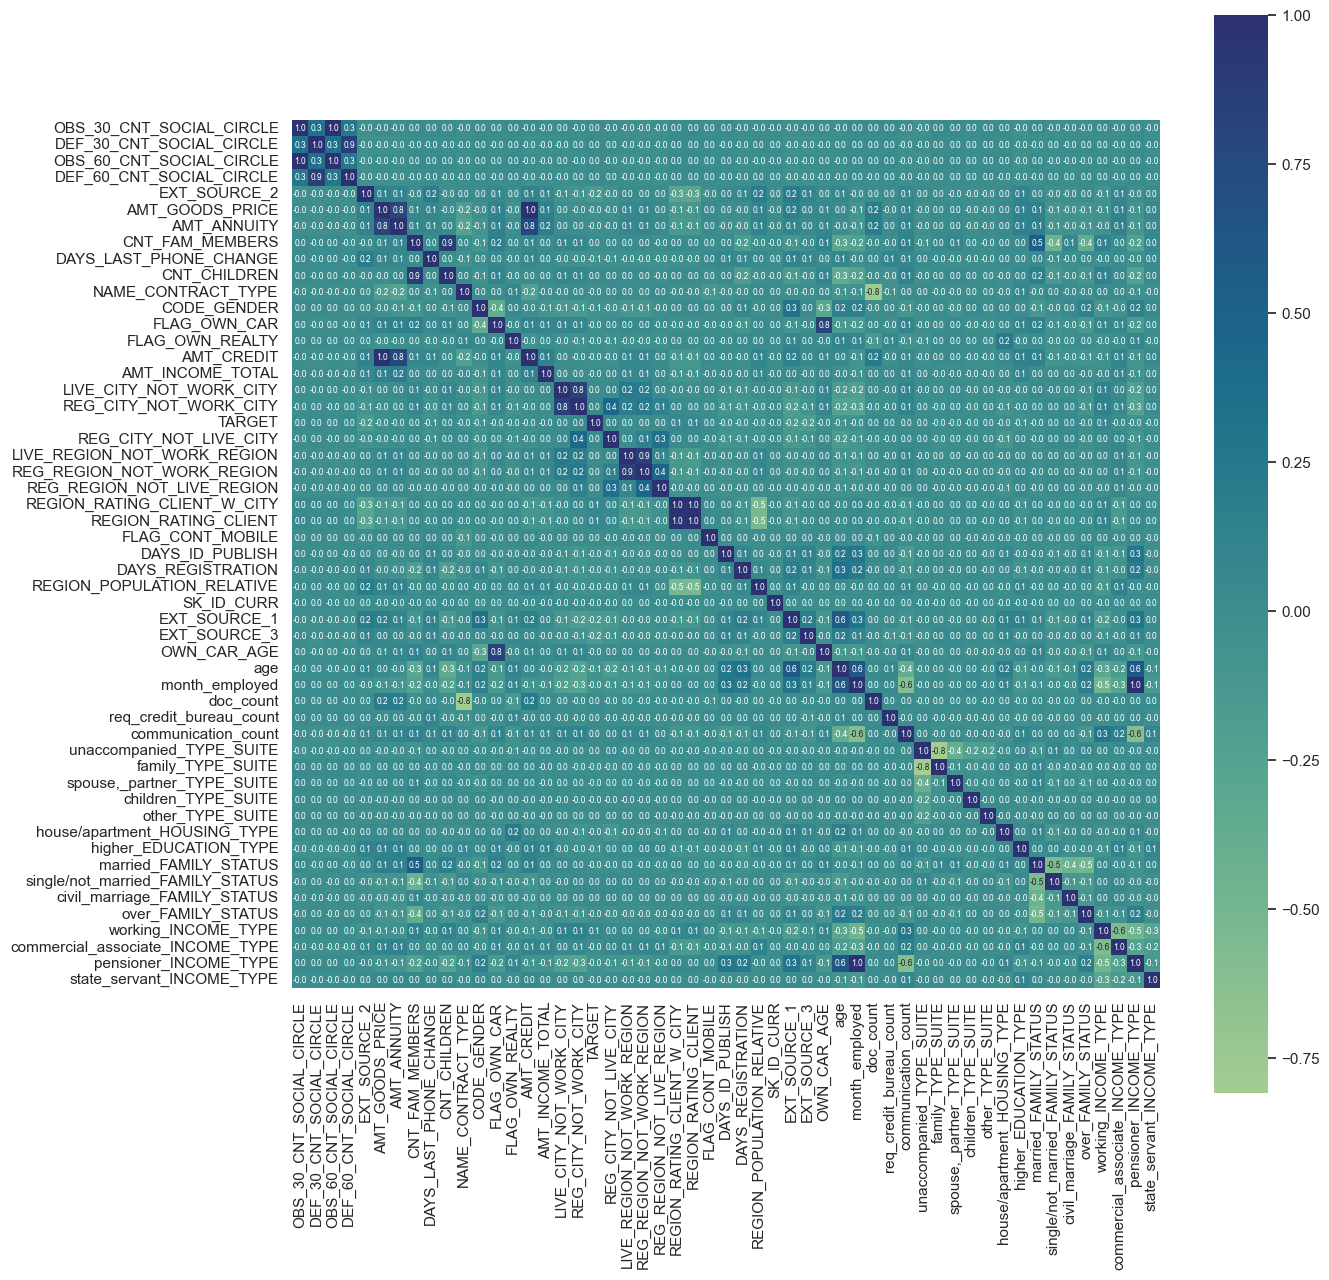

In [256]:
corr = df.corr()
plt.figure(figsize=[14,14])
sns.heatmap(corr, cmap='crest', annot=True, fmt='.1f', square=True,annot_kws={'size':'6'},xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [257]:
#  пенсионер, 3 из 4, amt_good_price, annuity, doc_count, famaly_type_suite

In [258]:
df.columns

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'CNT_CHILDREN', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY',
       'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'FLAG_CONT_MOBILE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'REGION_POPULATION_RELATIVE', 'SK_ID_CURR', 'EXT_SOURCE_1',
       'EXT_SOURCE_3', 'OWN_CAR_AGE', 'age', 'month_employed', 'doc_count',
       'req_credit_bureau_count', 'communication_count',
       'unaccompanied_TYPE_SUITE', 'family_TYPE_SUITE',
       'spouse,_partner_TYPE_SUITE', 'children_TYP

In [259]:
df.shape

(263418, 53)

In [260]:
del_df = df[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', \
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', \
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE', 'doc_count', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', \
        'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',  'unaccompanied_TYPE_SUITE', \
             'family_TYPE_SUITE', 'pensioner_INCOME_TYPE', 'month_employed', 'FLAG_OWN_CAR', 'OWN_CAR_AGE']]

<Axes: >

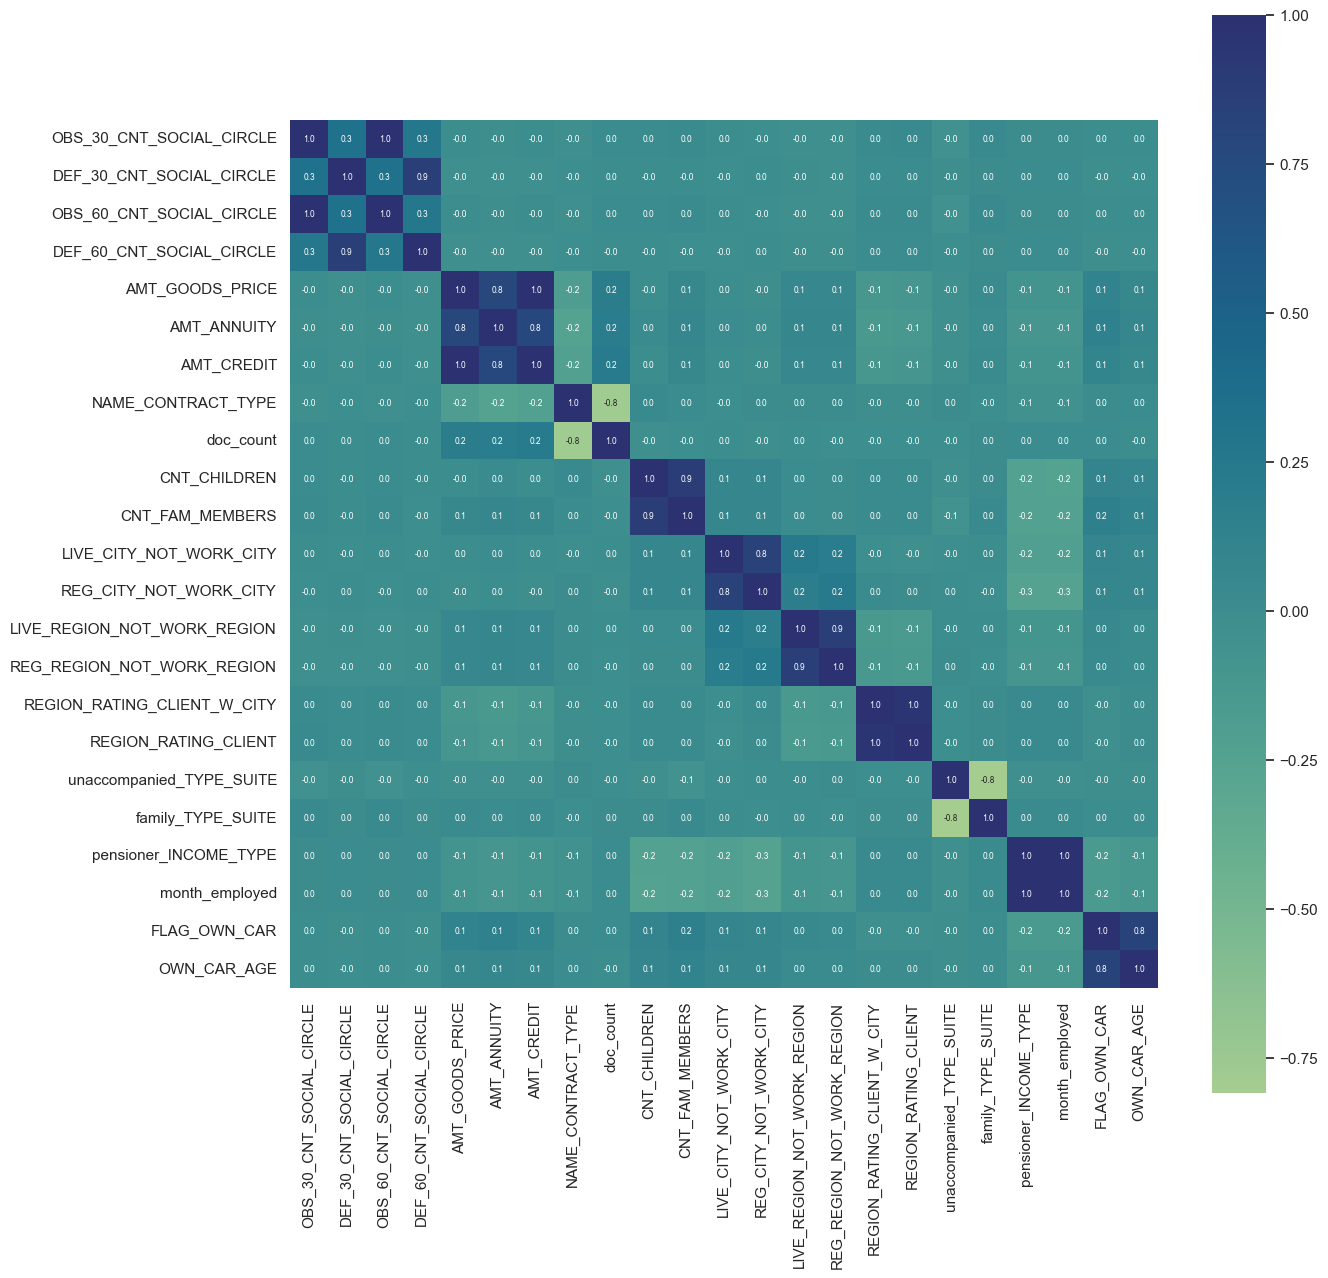

In [261]:
corr = del_df.corr()
plt.figure(figsize=[14,14])
sns.heatmap(corr, cmap='crest', annot=True, fmt='.1f', square=True,annot_kws={'size':'6'},xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [262]:
# удалим один из пары коррелирующих признаков
df.drop(columns=['pensioner_INCOME_TYPE', \
                 'OBS_30_CNT_SOCIAL_CIRCLE', \
                 'DEF_30_CNT_SOCIAL_CIRCLE', \
                 'DEF_60_CNT_SOCIAL_CIRCLE', \
                   'AMT_GOODS_PRICE', \
                    'CNT_FAM_MEMBERS', \
                    'REG_CITY_NOT_WORK_CITY', \
                    'AMT_ANNUITY', \
                    'family_TYPE_SUITE', \
                    'doc_count', \
                    'REG_REGION_NOT_WORK_REGION', \
                    'REGION_RATING_CLIENT',\
                    'FLAG_OWN_CAR'], inplace=True)

In [263]:
df.columns

Index(['OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE',
       'CNT_CHILDREN', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'LIVE_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY',
       'FLAG_CONT_MOBILE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'REGION_POPULATION_RELATIVE', 'SK_ID_CURR', 'EXT_SOURCE_1',
       'EXT_SOURCE_3', 'OWN_CAR_AGE', 'age', 'month_employed',
       'req_credit_bureau_count', 'communication_count',
       'unaccompanied_TYPE_SUITE', 'spouse,_partner_TYPE_SUITE',
       'children_TYPE_SUITE', 'other_TYPE_SUITE',
       'house/apartment_HOUSING_TYPE', 'higher_EDUCATION_TYPE',
       'married_FAMILY_STATUS', 'single/not_married_FAMILY_STATUS',
       'civil_marriage_FAMILY_STATUS', 'over_FAMILY_STATUS',
       'working_INCOME_TYPE', 'commercial_associate_INCOME_TYPE',
      

In [264]:
df.shape

(263418, 40)

# Регрессия

In [265]:
reg_df = df.drop(columns=["TARGET", "EXT_SOURCE_3", "EXT_SOURCE_1"])
reg_df = reg_df.merge(df_full[["EXT_SOURCE_3", "EXT_SOURCE_1", "SK_ID_CURR"]], on="SK_ID_CURR", how="inner")
reg_df

,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,FLAG_CONT_MOBILE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,SK_ID_CURR,OWN_CAR_AGE,age,month_employed,req_credit_bureau_count,communication_count,unaccompanied_TYPE_SUITE,"spouse,_partner_TYPE_SUITE",children_TYPE_SUITE,other_TYPE_SUITE,house/apartment_HOUSING_TYPE,higher_EDUCATION_TYPE,married_FAMILY_STATUS,single/not_married_FAMILY_STATUS,civil_marriage_FAMILY_STATUS,over_FAMILY_STATUS,working_INCOME_TYPE,commercial_associate_INCOME_TYPE,state_servant_INCOME_TYPE,EXT_SOURCE_3,EXT_SOURCE_1
0,2.0,0.262949,1134.0,0,0,0,1,406597.5,202500.0,0,0,0,0,2,1,2120,3648.0,0.018801,100002,-10.0,26,21,1.0,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0.139376,0.083037
1,1.0,0.622246,828.0,0,0,1,0,1293502.5,270000.0,0,0,0,0,1,1,291,1186.0,0.003541,100003,-10.0,46,39,0.0,2,0,0,0,0,1,1,1,0,0,0,0,0,1,NaN,0.311267
2,0.0,0.555912,815.0,0,1,0,1,135000.0,67500.0,0,0,0,0,2,1,2531,4260.0,0.010032,100004,26.0,53,7,0.0,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0.729567,NaN
3,0.0,0.322738,1106.0,0,0,0,1,513000.0,121500.0,1,0,0,0,2,1,3458,4311.0,0.028663,100007,-10.0,55,101,0.0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,NaN,NaN
4,0.0,0.354225,2536.0,0,0,0,1,490495.5,99000.0,0,0,0,0,2,1,477,4970.0,0.035792,100008,-10.0,47,52,2.0,2,0,1,0,0,1,0,1,0,0,0,0,0,1,0.621226,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263413,9.0,0.501221,2315.0,0,0,1,1,345510.0,112500.0,0,0,0,0,2,1,3936,675.0,0.022800,456247,-10.0,33,13,3.0,2,1,0,0,0,1,1,0,1,0,0,0,1,0,0.609276,0.243466
263414,0.0,0.346391,-0.0,0,0,1,1,225000.0,112500.0,0,0,0,0,2,1,2357,7369.0,0.022800,456249,-10.0,67,12174,2.0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0.742182,NaN
263415,6.0,0.535722,1909.0,0,0,1,1,677664.0,153000.0,1,0,0,0,3,1,5150,6737.0,0.005002,456253,-10.0,42,264,3.0,2,1,0,0,0,1,1,0,0,0,1,1,0,0,0.218859,0.744026
263416,0.0,0.514163,322.0,0,0,1,1,370107.0,171000.0,0,1,0,0,2,1,931,2562.0,0.005313,456254,-10.0,33,159,0.0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0.661024,NaN


In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


# 2. Разделение на признаки (X) и целевую переменную (y)
X = reg_df.dropna().drop(columns=["EXT_SOURCE_3", "EXT_SOURCE_2", 'EXT_SOURCE_1', "SK_ID_CURR"])
y = reg_df.dropna()["EXT_SOURCE_1"]

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def backward_stepwise_regression(X, y, p_threshold=0.05, min_features=1):
    """
    Выполняет пошаговую регрессию с исключением.

    Parameters:
        X (pd.DataFrame): Матрица признаков.
        y (pd.Series): Целевая переменная.
        p_threshold (float): Пороговое p-значение для исключения переменной.
        min_features (int): Минимальное количество признаков в модели.

    Returns:
        pd.DataFrame: Оптимальная матрица признаков.
        statsmodels.regression.linear_model.RegressionResultsWrapper: Результаты обучения модели.
    """
    X = sm.add_constant(X) # Добавляем столбец с константой
    remaining_features = list(X.columns)

    while len(remaining_features) > min_features:
      # Обучение модели
        model = sm.OLS(y, X[remaining_features])
        results = model.fit()

      # Находим признак с наибольшим p-значением
        p_values = results.pvalues[1:] # Исключаем константу
        max_p_value = p_values.max()
        max_p_feature = p_values.idxmax()
      
      # Проверяем условие для исключения
        if max_p_value > p_threshold:
            remaining_features.remove(max_p_feature)
        else:
            break # если нечего исключить, останавливаем
        
    # Обучение финальной модели
    final_model = sm.OLS(y, X[remaining_features])
    final_results = final_model.fit()
    
    return X[remaining_features], final_results

# 3. Выполнение пошаговой регрессии с исключением на обучающих данных
best_features, final_model_results = backward_stepwise_regression(X_train, y_train, p_threshold=0.05, min_features=1)

# 4. Вывод результатов
print("Оптимальные признаки:")
print(best_features.columns)
print("\nСводка финальной модели:")
print(final_model_results.summary())

# 5. Предсказание на тестовых данных (опционально)
X_test_with_const = sm.add_constant(X_test)
y_pred = final_model_results.predict(X_test_with_const[best_features.columns])

Оптимальные признаки:
Index(['const', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY',
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE',
       'OWN_CAR_AGE', 'age', 'month_employed', 'req_credit_bureau_count',
       'communication_count', 'unaccompanied_TYPE_SUITE',
       'house/apartment_HOUSING_TYPE', 'higher_EDUCATION_TYPE',
       'married_FAMILY_STATUS', 'single/not_married_FAMILY_STATUS',
       'civil_marriage_FAMILY_STATUS', 'over_FAMILY_STATUS',
       'working_INCOME_TYPE', 'commercial_associate_INCOME_TYPE',
       'state_servant_INCOME_TYPE'],
      dtype='object')

Сводка финальной модели:
                            OLS Regression Results                            
Dep. Variable:           EXT_SOURCE_1   R-squared: 

In [267]:
len(best_features.columns)

30

In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 2. Разделение на признаки (X) и целевую переменную (y)
X = reg_df.dropna()[best_features.columns[1:]]
y = reg_df.dropna()["EXT_SOURCE_1"]

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 6. Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Коэффициенты (w): {model.coef_}")
print(f"Смещение (b): {model.intercept_:.2f}")

MSE: 0.02
R^2: 0.46
Коэффициенты (w): [-5.25185185e-04  1.09049187e-05  2.35221491e-02  1.09903724e-01
  3.89779844e-03  2.72448138e-08  4.10701686e-09 -1.37617002e-02
 -1.89035053e-02  1.52505676e-02 -2.96925276e-02  2.21726314e-06
  4.84277691e-07  3.11006851e-01  1.31252863e-04  1.12163829e-02
  2.39996145e-05 -1.45842033e-03  1.54157046e-02  4.41607766e-03
  7.05756759e-03  6.17385626e-02  1.54925442e-02 -9.70530381e-04
 -5.34360643e-03 -9.17840736e-03  2.97389144e-01  3.11528633e-01
  3.13917474e-01]
Смещение (b): -0.37


In [269]:
y_pred = model.predict(reg_df[reg_df.EXT_SOURCE_1.isna()][best_features.columns[1:]])
y_pred

array([0.55771948, 0.54655167, 0.52129566, ..., 0.55935694, 0.77152703,
       0.41059642])

In [270]:
reg_df.loc[ reg_df.EXT_SOURCE_1.isna() ,"EXT_SOURCE_1" ] = y_pred

EXP_3

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


# 2. Разделение на признаки (X) и целевую переменную (y)
X = reg_df.dropna().drop(columns=["EXT_SOURCE_3", "EXT_SOURCE_2", 'EXT_SOURCE_1', "SK_ID_CURR"])
y = reg_df.dropna()["EXT_SOURCE_3"]

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def backward_stepwise_regression(X, y, p_threshold=0.05, min_features=1):
    """
    Выполняет пошаговую регрессию с исключением.

    Parameters:
        X (pd.DataFrame): Матрица признаков.
        y (pd.Series): Целевая переменная.
        p_threshold (float): Пороговое p-значение для исключения переменной.
        min_features (int): Минимальное количество признаков в модели.

    Returns:
        pd.DataFrame: Оптимальная матрица признаков.
        statsmodels.regression.linear_model.RegressionResultsWrapper: Результаты обучения модели.
    """
    X = sm.add_constant(X) # Добавляем столбец с константой
    remaining_features = list(X.columns)

    while len(remaining_features) > min_features:
      # Обучение модели
        model = sm.OLS(y, X[remaining_features])
        results = model.fit()

      # Находим признак с наибольшим p-значением
        p_values = results.pvalues[1:] # Исключаем константу
        max_p_value = p_values.max()
        max_p_feature = p_values.idxmax()
      
      # Проверяем условие для исключения
        if max_p_value > p_threshold:
            remaining_features.remove(max_p_feature)
        else:
            break # если нечего исключить, останавливаем
        
    # Обучение финальной модели
    final_model = sm.OLS(y, X[remaining_features])
    final_results = final_model.fit()
    
    return X[remaining_features], final_results

# 3. Выполнение пошаговой регрессии с исключением на обучающих данных
best_features, final_model_results = backward_stepwise_regression(X_train, y_train, p_threshold=0.05, min_features=1)

# 4. Вывод результатов
print("Оптимальные признаки:")
print(best_features.columns)
print("\nСводка финальной модели:")
print(final_model_results.summary())

# 5. Предсказание на тестовых данных (опционально)
X_test_with_const = sm.add_constant(X_test)
y_pred = final_model_results.predict(X_test_with_const[best_features.columns])

Оптимальные признаки:
Index(['const', 'DAYS_LAST_PHONE_CHANGE', 'CNT_CHILDREN', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_CONT_MOBILE', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'age',
       'month_employed', 'req_credit_bureau_count', 'communication_count',
       'unaccompanied_TYPE_SUITE', 'spouse,_partner_TYPE_SUITE',
       'house/apartment_HOUSING_TYPE', 'single/not_married_FAMILY_STATUS',
       'over_FAMILY_STATUS', 'working_INCOME_TYPE',
       'commercial_associate_INCOME_TYPE', 'state_servant_INCOME_TYPE'],
      dtype='object')

Сводка финальной модели:
                            OLS Regression Results                            
Dep. Variable:           EXT_SOURCE_3   R-squared:                     

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 2. Разделение на признаки (X) и целевую переменную (y)
X = reg_df.dropna()[best_features.columns[1:]]
y = reg_df.dropna()["EXT_SOURCE_3"]

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 6. Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Коэффициенты (w): {model.coef_}")
print(f"Смещение (b): {model.intercept_:.2f}")

MSE: 0.04
R^2: 0.07
Коэффициенты (w): [-1.10315198e-04  1.47431611e-05  1.00871737e-02 -4.70031587e-03
  9.52179409e-03  1.65413771e-08 -1.84865942e-08 -7.38664088e-03
 -2.07126862e-02 -3.75452870e-02 -9.19777982e-03  1.13576569e-05
  2.45106624e-06 -3.77019114e-01 -6.91029267e-05  2.78881380e-03
  2.88515431e-05 -8.04118113e-03 -1.05538917e-02 -1.80032745e-02
  5.72001147e-03 -1.65487163e-03  2.82481516e-03 -1.95886534e-03
  2.64481159e-03 -3.51076140e-03  3.67914068e-01  3.72027681e-01
  3.77034933e-01]
Смещение (b): 0.02


In [272]:
y_pred = model.predict(reg_df[reg_df.EXT_SOURCE_3.isna()][best_features.columns[1:]])
y_pred

array([0.52813718, 0.56116533, 0.46078676, ..., 0.48000231, 0.53438328,
       0.53823811])

In [273]:
reg_df.loc[ reg_df.EXT_SOURCE_3.isna() ,"EXT_SOURCE_3" ] = y_pred

In [274]:
df = df.drop(columns=["EXT_SOURCE_1", "EXT_SOURCE_3"]).merge(reg_df[["EXT_SOURCE_1", "EXT_SOURCE_3", "SK_ID_CURR"]], on="SK_ID_CURR")

In [275]:
df

,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,FLAG_CONT_MOBILE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,SK_ID_CURR,OWN_CAR_AGE,age,month_employed,req_credit_bureau_count,communication_count,unaccompanied_TYPE_SUITE,"spouse,_partner_TYPE_SUITE",children_TYPE_SUITE,other_TYPE_SUITE,house/apartment_HOUSING_TYPE,higher_EDUCATION_TYPE,married_FAMILY_STATUS,single/not_married_FAMILY_STATUS,civil_marriage_FAMILY_STATUS,over_FAMILY_STATUS,working_INCOME_TYPE,commercial_associate_INCOME_TYPE,state_servant_INCOME_TYPE,EXT_SOURCE_1,EXT_SOURCE_3
0,2.0,0.262949,1134.0,0,0,0,1,406597.5,202500.0,0,1,0,0,0,2,1,2120,3648.0,0.018801,100002,-10.0,26,21,1.0,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0.083037,0.139376
1,1.0,0.622246,828.0,0,0,1,0,1293502.5,270000.0,0,0,0,0,0,1,1,291,1186.0,0.003541,100003,-10.0,46,39,0.0,2,0,0,0,0,1,1,1,0,0,0,0,0,1,0.311267,0.528137
2,0.0,0.555912,815.0,0,1,0,1,135000.0,67500.0,0,0,0,0,0,2,1,2531,4260.0,0.010032,100004,26.0,53,7,0.0,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0.557719,0.729567
3,0.0,0.322738,1106.0,0,0,0,1,513000.0,121500.0,1,0,0,0,0,2,1,3458,4311.0,0.028663,100007,-10.0,55,101,0.0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0.546552,0.561165
4,0.0,0.354225,2536.0,0,0,0,1,490495.5,99000.0,0,0,0,0,0,2,1,477,4970.0,0.035792,100008,-10.0,47,52,2.0,2,0,1,0,0,1,0,1,0,0,0,0,0,1,0.521296,0.621226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263413,9.0,0.501221,2315.0,0,0,1,1,345510.0,112500.0,0,0,0,0,0,2,1,3936,675.0,0.022800,456247,-10.0,33,13,3.0,2,1,0,0,0,1,1,0,1,0,0,0,1,0,0.243466,0.609276
263414,0.0,0.346391,-0.0,0,0,1,1,225000.0,112500.0,0,0,0,0,0,2,1,2357,7369.0,0.022800,456249,-10.0,67,12174,2.0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0.771527,0.742182
263415,6.0,0.535722,1909.0,0,0,1,1,677664.0,153000.0,1,0,0,0,0,3,1,5150,6737.0,0.005002,456253,-10.0,42,264,3.0,2,1,0,0,0,1,1,0,0,0,1,1,0,0,0.744026,0.218859
263416,0.0,0.514163,322.0,0,0,1,1,370107.0,171000.0,0,1,1,0,0,2,1,931,2562.0,0.005313,456254,-10.0,33,159,0.0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0.410596,0.661024


In [163]:
df.to_csv('выборка_после_обработки.csv', index=False)